In [ ]:
! pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#  importing dataset
! kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:00<00:00, 259MB/s]
100% 163M/163M [00:00<00:00, 261MB/s]


In [ ]:
! unzip /content/face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [ ]:
import os
import numpy ,seaborn,math
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mping
from google.colab.patches import cv2_imshow
from PIL import Image

In [ ]:
print(os.listdir('/content/data'))


['with_mask', 'without_mask']


In [ ]:
with_mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')
print(len(with_mask))
print(len(without_mask))

3725
3828


In [ ]:
# creating labels for the dataet
with_mask_ =[1] * len(with_mask)
without_mask_ = [0]* len(without_mask)

In [ ]:
labels = with_mask_+without_mask_

In [ ]:
print(os.listdir('/content/data/without_mask'))

['without_mask_554.jpg', 'without_mask_1371.jpg', 'without_mask_653.jpg', 'without_mask_2455.jpg', 'without_mask_3288.jpg', 'without_mask_746.jpg', 'without_mask_2189.jpg', 'without_mask_1628.jpg', 'without_mask_582.jpg', 'without_mask_108.jpg', 'without_mask_2283.jpg', 'without_mask_2524.jpg', 'without_mask_2188.jpg', 'without_mask_267.jpg', 'without_mask_982.jpg', 'without_mask_1270.jpg', 'without_mask_3088.jpg', 'without_mask_1871.jpg', 'without_mask_3133.jpg', 'without_mask_894.jpg', 'without_mask_3289.jpg', 'without_mask_1735.jpg', 'without_mask_1512.jpg', 'without_mask_80.jpg', 'without_mask_1126.jpg', 'without_mask_1872.jpg', 'without_mask_1974.jpg', 'without_mask_1544.jpg', 'without_mask_2764.jpg', 'without_mask_1026.jpg', 'without_mask_3086.jpg', 'without_mask_695.jpg', 'without_mask_307.jpg', 'without_mask_915.jpg', 'without_mask_1002.jpg', 'without_mask_3410.jpg', 'without_mask_3065.jpg', 'without_mask_1435.jpg', 'without_mask_197.jpg', 'without_mask_2863.jpg', 'without_mask

In [ ]:
os.path.join('/content/data/without_mask')

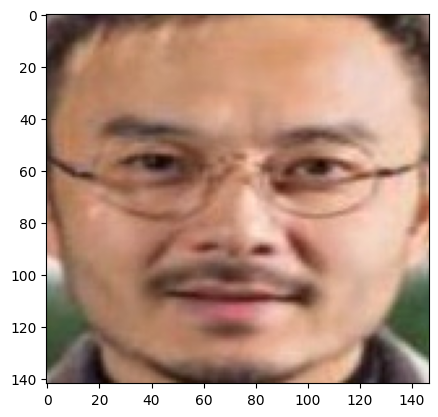

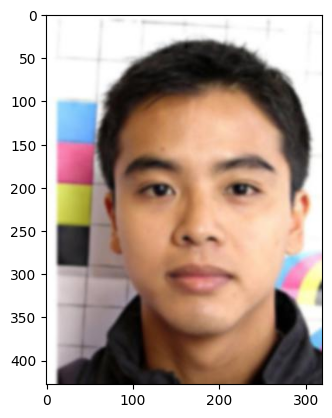

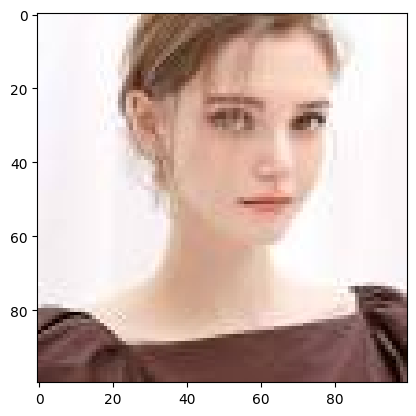

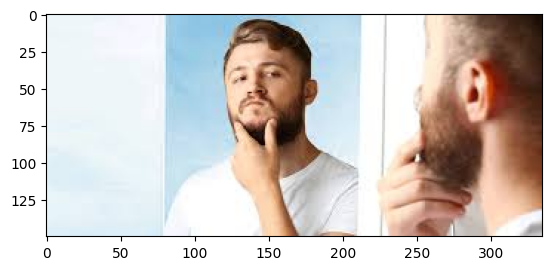

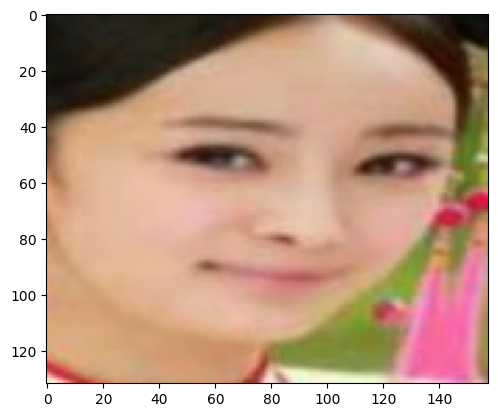

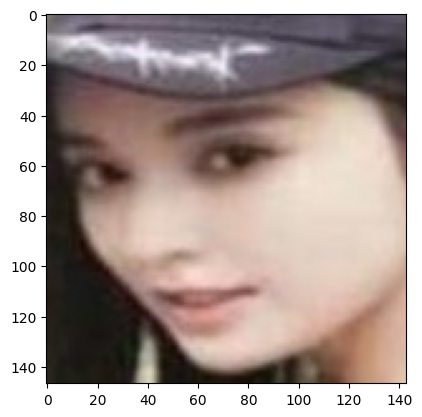

In [ ]:
# diplaying the images
for i in range(6):
    data =os.listdir('/content/data/without_mask')
    image_path = os.path.join('/content/data/without_mask',data[i])
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.show()

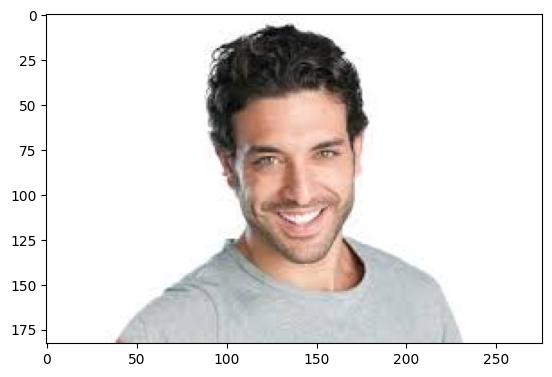

In [ ]:
image = Image.open('/content/data/without_mask/without_mask_1000.jpg')

plt.imshow(image)

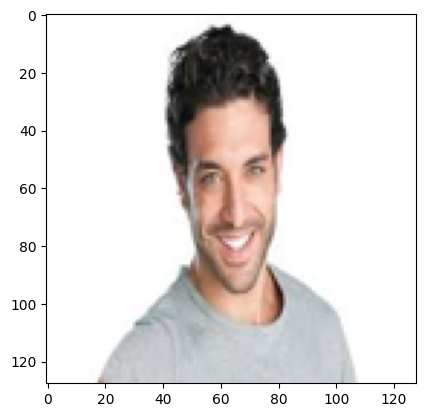

In [ ]:
img= Image.open('/content/data/without_mask/without_mask_1000.jpg')
img = img.resize((128,128))
plt.imshow(img)


In [ ]:
# converting image s into numpy arrays
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
data

[array([[[148, 137, 137],
         [ 63,  52,  53],
         [ 85,  76,  76],
         ...,
         [ 95,  88,  81],
         [236, 233, 229],
         [255, 255, 254]],
 
        [[109, 108, 110],
         [ 30,  28,  30],
         [ 97,  94,  97],
         ...,
         [129, 121, 119],
         [239, 236, 237],
         [255, 255, 255]],
 
        [[105, 110, 113],
         [  0,   0,   0],
         [ 18,  17,  22],
         ...,
         [156, 147, 148],
         [244, 240, 243],
         [254, 253, 255]],
 
        ...,
 
        [[252, 254, 253],
         [254, 255, 255],
         [255, 255, 255],
         ...,
         [173, 171, 185],
         [247, 244, 248],
         [255, 253, 247]],
 
        [[253, 250, 251],
         [250, 245, 246],
         [248, 242, 245],
         ...,
         [179, 175, 189],
         [248, 246, 250],
         [255, 254, 254]],
 
        [[186, 180, 182],
         [150, 139, 142],
         [175, 162, 166],
         ...,
         [180, 176, 189],
  

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
type(data)
len(data)

7553

In [ ]:
# the data shoulb be in array not in list
x = np.array(data)
y= np.array(labels)

In [ ]:
x.shape

(7553, 128, 128, 3)

In [ ]:
# spplitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state  =1234,test_size =0.25,stratify = y)



In [ ]:
# scaling
x_train_Scaled = x_train/255.0
x_test_scaled =x_test/255.0

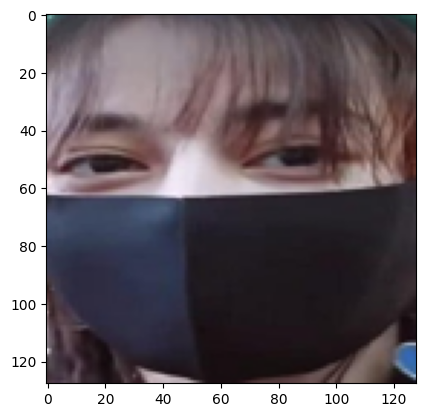

In [ ]:
plt.imshow(x_train[0])

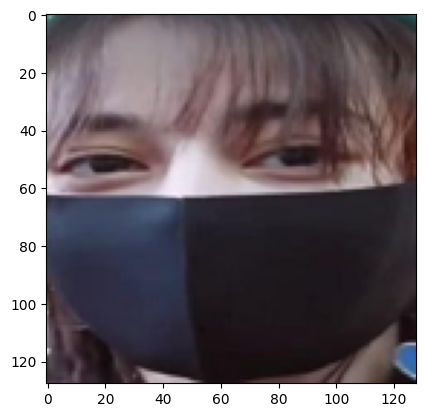

In [ ]:
plt.imshow(x_train_Scaled[0])

In [ ]:
x_train_Scaled[0][0]

array([[0.23529412, 0.45882353, 0.43921569],
       [0.4       , 0.60784314, 0.59215686],
       [0.35294118, 0.5254902 , 0.52156863],
       [0.21568627, 0.36470588, 0.36470588],
       [0.21960784, 0.3372549 , 0.35294118],
       [0.22352941, 0.31372549, 0.3372549 ],
       [0.22745098, 0.28235294, 0.31372549],
       [0.23137255, 0.25098039, 0.29803922],
       [0.24313725, 0.23921569, 0.29019608],
       [0.24705882, 0.23529412, 0.28235294],
       [0.23529412, 0.22352941, 0.26666667],
       [0.24705882, 0.23921569, 0.2745098 ],
       [0.25490196, 0.25098039, 0.28235294],
       [0.24705882, 0.24705882, 0.27843137],
       [0.25882353, 0.25882353, 0.29019608],
       [0.26666667, 0.26666667, 0.29803922],
       [0.28235294, 0.27843137, 0.30980392],
       [0.28235294, 0.27843137, 0.30980392],
       [0.29411765, 0.28627451, 0.32156863],
       [0.28627451, 0.2745098 , 0.30980392],
       [0.28627451, 0.2745098 , 0.30588235],
       [0.29411765, 0.28235294, 0.30980392],
       [0.

In [ ]:
# building a CNN

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(128,activation = 'relu',kernel_size = (3,3)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation ='relu',))
model.add(keras.layers.Dropout(0.10))

model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Dense(32,activation ='relu'))
model.add(keras.layers.Dense(2,activation = 'sigmoid'))


In [ ]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [ ]:
history = model.fit(x_train_Scaled,y_train,validation_split = 0.30,epochs = 50)

Epoch 1/50
124/124 [==============================] - 14s 48ms/step - loss: 0.3994 - accuracy: 0.8300 - val_loss: 0.2574 - val_accuracy: 0.8988
Epoch 2/50
124/124 [==============================] - 4s 30ms/step - loss: 0.2584 - accuracy: 0.8951 - val_loss: 0.2924 - val_accuracy: 0.8800
Epoch 3/50
124/124 [==============================] - 4s 32ms/step - loss: 0.2281 - accuracy: 0.9160 - val_loss: 0.2244 - val_accuracy: 0.9118
Epoch 4/50
124/124 [==============================] - 4s 33ms/step - loss: 0.1771 - accuracy: 0.9367 - val_loss: 0.2134 - val_accuracy: 0.9229
Epoch 5/50
124/124 [==============================] - 4s 30ms/step - loss: 0.1349 - accuracy: 0.9523 - val_loss: 0.2677 - val_accuracy: 0.9182
Epoch 6/50
124/124 [==============================] - 4s 30ms/step - loss: 0.1162 - accuracy: 0.9564 - val_loss: 0.2089 - val_accuracy: 0.9335
Epoch 7/50
124/124 [==============================] - 4s 30ms/step - loss: 0.0943 - accuracy: 0.9682 - val_loss: 0.2446 - val_accuracy: 0.932

In [ ]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print("LOSS",loss,' accuracy',accuracy)

60/60 [==============================] - 1s 17ms/step - loss: 0.3230 - accuracy: 0.9338
LOSS 0.3230050504207611  accuracy 0.9338274002075195


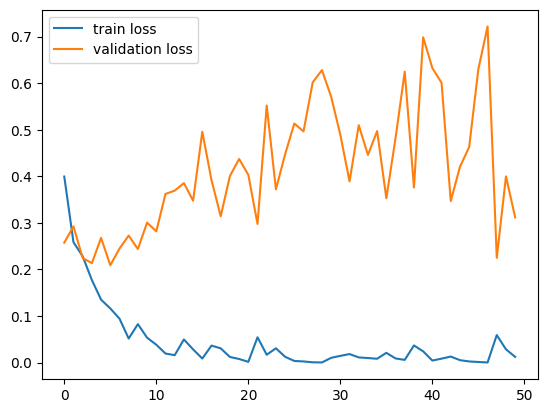

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# # plot the accuracy value
#

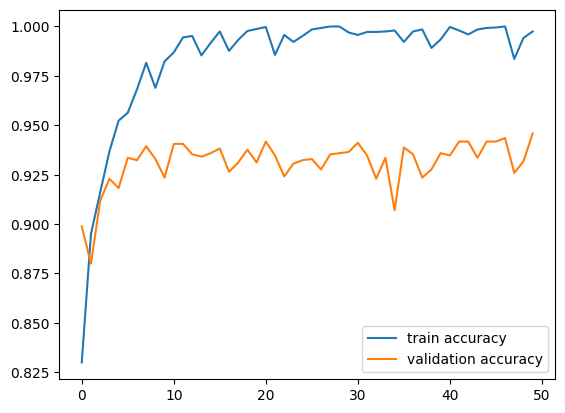

In [ ]:
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
def predict():

  image_path = input('')


  image= cv2.imread(image_path)
  plt.imshow(image)
  image = cv2.resize(image,(128,128))
  image_scaled = image/255.0
  image_resize = np.resize(image_scaled,(1,128,128,3))
  prediction = model.predict(image_resize)


  input_pred_label = np.argmax(prediction)

  print(input_pred_label)


  if input_pred_label == 1:

    print('The person in the image is wearing a mask')

  else:

    print('The person in the image is not wearing a mask')

/content/data/with_mask/with_mask_1003.jpg
1/1 [==============================] - 0s 21ms/step
1
The person in the image is wearing a mask


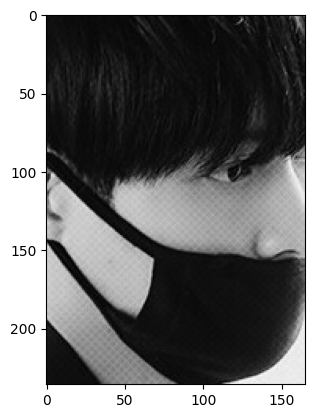

In [ ]:
predict()

/content/data/with_mask/with_mask_1013.jpg
1/1 [==============================] - 0s 18ms/step
1
The person in the image is wearing a mask


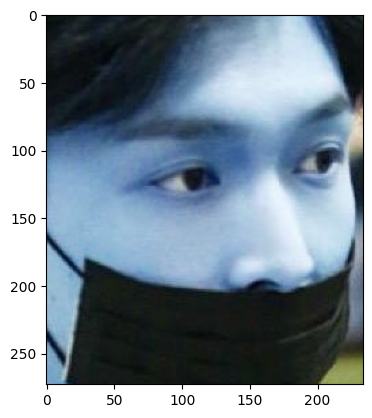

In [ ]:
predict()

/content/data/without_mask/without_mask_114.jpg
1/1 [==============================] - 0s 18ms/step
0
The person in the image is not wearing a mask


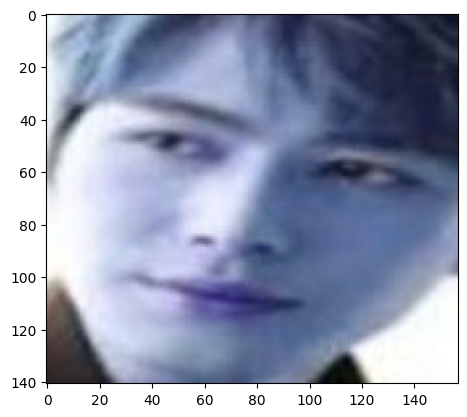

In [ ]:
predict()

/content/data/without_mask/without_mask_115.jpg
1/1 [==============================] - 0s 18ms/step
0
The person in the image is not wearing a mask


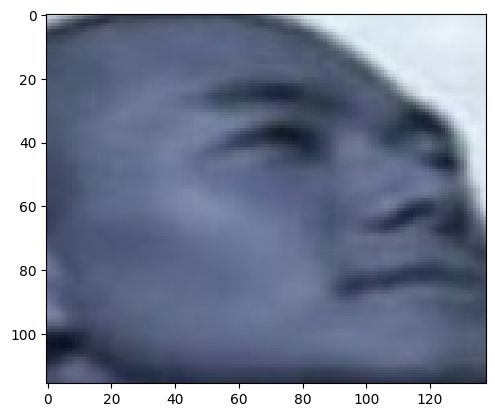

In [ ]:
predict()